# User Review Feedback Classifier
Developed with Scikit-learn, Pandas, etc.

Based on the following [tutorial](https://www.youtube.com/watch?v=M9Itm95JzL0), from Keith Galli.

Reviews retrieved from the following [Amazon user reviews dataset](https://nijianmo.github.io/amazon/index.html).

### 1. Load Data

In [1]:
import pandas as pd
import numpy as np

# Load raw data
raw_df = pd.read_json("./data/feedback/Reviews_100k.json")
raw_df

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"01 1, 2014",A2JY90TWJY6JUN,0983429405,{'Format:': ' Kindle Edition'},M. Mander,I am enjoying this informative book and will c...,very useful book,1388534400,NaN,NaN
1,5,False,"10 1, 2014",A2X9MVOFF593CP,0373773846,{'Format:': ' Kindle Edition'},Stephanie,For the past several years Garth Duncan has ha...,An Author Who Makes You Root for the Villian!,1412121600,NaN,NaN
2,5,True,"10 9, 2014",A3BK2NSHZWNB7,1416567178,{'Format:': ' Mass Market Paperback'},BCS,Great story!,Five Stars,1412812800,NaN,NaN
3,5,True,"09 8, 2014",A11PTQ33D2V7FO,0891415440,{'Format:': ' Paperback'},Beverly Cobb,loved his speech at graduation - haven't had a...,loved his speech at graduation - haven't had a...,1410134400,NaN,NaN
4,5,True,"12 23, 2014",A31U1BI272EHBQ,0230531423,{'Format:': ' Kindle Edition'},tom,Excellent. Fast moving novel with a lot of twi...,Five Stars,1419292800,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,5,True,"03 22, 2014",AHEFWE15V4V2V,1451655789,{'Format:': ' Kindle Edition'},Mary Ann Curran,This was my first book written by Lucinda Rile...,I loved this book!,1395446400,NaN,NaN
99996,4,True,"08 6, 2014",A3KHI2BWMZBGBR,0615437850,{'Format:': ' Kindle Edition'},Morgan,intriguing and entertaining. Very interesting ...,intriguing and entertaining,1407283200,NaN,NaN
99997,5,True,"08 17, 2014",AGSD81W1G7OFO,1630350354,{'Format:': ' Kindle Edition'},MGC,I have loved all the books in this series and ...,That was the end,1408233600,3,NaN
99998,4,True,"07 27, 2014",A2N042WE38C8QP,144210242X,{'Format:': ' Kindle Edition'},cindy,fast paced and hard to put down. Great read,Great,1406419200,NaN,NaN


In [50]:
# Filter necessary columns
df = raw_df[["reviewText", "overall"]][:100000]
df

,reviewText,overall
0,I am enjoying this informative book and will c...,5
1,For the past several years Garth Duncan has ha...,5
2,Great story!,5
3,loved his speech at graduation - haven't had a...,5
4,Excellent. Fast moving novel with a lot of twi...,5
...,...,...
99995,This was my first book written by Lucinda Rile...,5
99996,intriguing and entertaining. Very interesting ...,4
99997,I have loved all the books in this series and ...,5
99998,fast paced and hard to put down. Great read,4


### 2. Prepare Data

In [51]:
# Add feedback classification column
conditions = [
    df["overall"] <= 2,
    df["overall"] == 3,
    df["overall"] >= 4
]

classes = [
    "NEGATIVE",
    "NEUTRAL",
    "POSITIVE"
]

df["feedback"] = np.select(conditions, classes)
df

,reviewText,overall,feedback
0,I am enjoying this informative book and will c...,5,POSITIVE
1,For the past several years Garth Duncan has ha...,5,POSITIVE
2,Great story!,5,POSITIVE
3,loved his speech at graduation - haven't had a...,5,POSITIVE
4,Excellent. Fast moving novel with a lot of twi...,5,POSITIVE
...,...,...,...
99995,This was my first book written by Lucinda Rile...,5,POSITIVE
99996,intriguing and entertaining. Very interesting ...,4,POSITIVE
99997,I have loved all the books in this series and ...,5,POSITIVE
99998,fast paced and hard to put down. Great read,4,POSITIVE


In [52]:
# Split data into training and test set
from sklearn.model_selection import train_test_split

split_seed = 10
train, test = train_test_split(df, test_size=0.33, random_state=split_seed)

print("Training Set Length:", len(train))
print("Test Set Length:", len(test))

Training Set Length: 67000
Test Set Length: 33000


In [53]:
# Seperate features from labels
train_x = train[["reviewText"]]
train_y = train[["feedback"]]

test_x = test[["reviewText"]]
test_y = test[["feedback"]]

### 3. Text Vectorization

In [54]:
# Tokenize text into bags of words
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
train_x_vectors = vectorizer.fit_transform(train_x["reviewText"].values.astype('U'))
test_x_vectors = vectorizer.transform(test_x["reviewText"].values.astype('U'))

### 4. Training

#### 4.1. Linear SVM

In [58]:
from sklearn import svm

clf_svm = svm.SVC(kernel="linear")

clf_svm.fit(train_x_vectors, train_y.values.ravel())

test_review = test_x.iloc[0].values[0]
clf_svm_prediction = clf_svm.predict(test_x_vectors[0])

print("Test Review:", test_review)
print("Prediction:", clf_svm_prediction[0])

Test Review: I was very disappointed with this book. Maybe my expectations were higher as I've  enjoyed so many other John Grisham novels. This novel is no comparison to the others. The main character has no depth. The story is like reading a documentary about the coal industry. I don't know what he was going for here, but it failed to engage me.
Prediction: NEGATIVE


#### 4.2. Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier()

clf_tree.fit(train_x_vectors, train_y.values.ravel())

test_review = test_x.iloc[0].values[0]
clf_tree_prediction = clf_tree.predict(test_x_vectors[0])

print("Test Review:", test_review)
print("Prediction:", clf_tree_prediction[0])

Test Review: I was very disappointed with this book. Maybe my expectations were higher as I've  enjoyed so many other John Grisham novels. This novel is no comparison to the others. The main character has no depth. The story is like reading a documentary about the coal industry. I don't know what he was going for here, but it failed to engage me.
Prediction: NEUTRAL


#### 4.3. Naive Bayes

In [60]:
from sklearn.naive_bayes import GaussianNB

clf_nb = GaussianNB()

clf_nb.fit(train_x_vectors.toarray(), train_y.values.ravel())

test_review = test_x.iloc[0].values[0]
clf_nb_prediction = clf_nb.predict(test_x_vectors[0].toarray())

print("Test Review:", test_review)
print("Prediction:", clf_nb_prediction[0])

Test Review: I was very disappointed with this book. Maybe my expectations were higher as I've  enjoyed so many other John Grisham novels. This novel is no comparison to the others. The main character has no depth. The story is like reading a documentary about the coal industry. I don't know what he was going for here, but it failed to engage me.
Prediction: NEUTRAL


#### 4.4. Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression(max_iter=1000)

clf_log.fit(train_x_vectors, train_y.values.ravel())

test_review = test_x.iloc[0].values[0]
clf_log_prediction = clf_log.predict(test_x_vectors[0])

print("Test Review:", test_review)
print("Prediction:", clf_log_prediction[0])

Test Review: I was very disappointed with this book. Maybe my expectations were higher as I've  enjoyed so many other John Grisham novels. This novel is no comparison to the others. The main character has no depth. The story is like reading a documentary about the coal industry. I don't know what he was going for here, but it failed to engage me.
Prediction: NEGATIVE


### 5. Evaluation

In [72]:
accuracies = [
    ["SVM", clf_svm.score(test_x_vectors, test_y)],
    ["Decision Tree", clf_tree.score(test_x_vectors, test_y)],
    ["Naive Bayes", clf_nb.score(test_x_vectors.toarray(), test_y)],
    ["Logistic Regression", clf_log.score(test_x_vectors, test_y)],
]

pd.DataFrame(data=accuracies, columns=["Classifier", "Accuracy"])

,Classifier,Accuracy
0,SVM,0.673608
1,Decision Tree,0.493637
2,Naive Bayes,0.399603
3,Logistic Regression,0.677739


In [73]:
from sklearn.metrics import f1_score

f1_svm = f1_score(test_y, clf_svm.predict(test_x_vectors), average=None, labels=["NEGATIVE", "NEUTRAL", "POSITIVE"])
f1_tree = f1_score(test_y, clf_tree.predict(test_x_vectors), average=None, labels=["NEGATIVE", "NEUTRAL", "POSITIVE"])
f1_nb = f1_score(test_y, clf_nb.predict(test_x_vectors.toarray()), average=None, labels=["NEGATIVE", "NEUTRAL", "POSITIVE"])
f1_log = f1_score(test_y, clf_log.predict(test_x_vectors), average=None, labels=["NEGATIVE", "NEUTRAL", "POSITIVE"])

f1_scores = [
    ["SVM", f1_svm[0], f1_svm[1], f1_svm[2]],
    ["Decision Tree", f1_tree[0], f1_tree[1], f1_tree[2]],
    ["Naive Bayes", f1_nb[0], f1_nb[1], f1_nb[2]],
    ["Logistic Regression", f1_log[0], f1_log[1], f1_log[2]],
]

pd.DataFrame(data=f1_scores, columns=["Classifier", "F1(Negatives)", "F1(Neutrals)", "F1(Positives)"])

,Classifier,F1(Negatives),F1(Neutrals),F1(Positives)
0,SVM,0.682661,0.584615,0.753537
1,Decision Tree,0.487072,0.425657,0.569990
2,Naive Bayes,0.361184,0.310781,0.489416
3,Logistic Regression,0.684341,0.588945,0.757709


<AxesSubplot:>

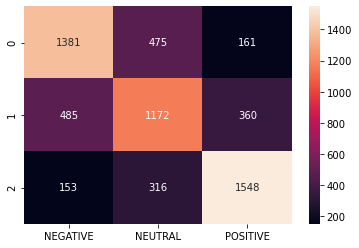

In [74]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib as plt

predictions = clf_log.predict(test_x_vectors)

labels = ["NEGATIVE", "NEUTRAL", "POSITIVE"]

cm = confusion_matrix(test_y, predictions, labels=labels)
df_cm = pd.DataFrame(cm, columns=labels)

sn.heatmap(df_cm, annot=True, fmt="d")

### 6. Improvements

#### 6.1. Even the number of labels
After running this improvement, run everything from section 3 to 5 to get the new results

In [55]:
# Count labels in each set
train_count = train_y.value_counts("feedback")
test_count = test_y.value_counts("feedback")

print("Label counts in Training Set:\n", train_count, "\n")
print("Label counts in Test Set:\n", test_count)

Label counts in Training Set:
 feedback
POSITIVE    56782
NEUTRAL      6029
NEGATIVE     4189
dtype: int64 

Label counts in Test Set:
 feedback
POSITIVE    28012
NEUTRAL      2971
NEGATIVE     2017
dtype: int64


In [56]:
# Clearly, there's way too many positive reviews. Let's even it out
def even_labels(df):
    positives = df[df["feedback"] == "POSITIVE"]
    neutrals = df[df["feedback"] == "NEUTRAL"]
    negatives = df[df["feedback"] == "NEGATIVE"]

    count_negatives = df.value_counts("feedback")[2]
    positives = positives[:count_negatives]
    neutrals = neutrals[:count_negatives]
    
    shrunk_df = positives.append(neutrals).append(negatives)
    
    shuffled_df = shrunk_df.sample(frac=1).reset_index(drop=True)
    
    return shuffled_df[["reviewText"]], shuffled_df[["feedback"]]

# The new training and test sets are ready for training
train_x, train_y = even_labels(train)
test_x, test_y = even_labels(test)

#### 6.2. Prioritize certain tokens
After running this improvement, run everything from section 4 and 5 to get the new results

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
train_x_vectors = vectorizer.fit_transform(train_x["reviewText"].values.astype('U'))
test_x_vectors = vectorizer.transform(test_x["reviewText"].values.astype('U'))

#### 6.3. Apply Grid Search
After running this improvement, run everything from section 4 and 5 to get the new results

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "kernel": ("linear", "rbf"),
    "C": (1,4,8,16,32)
}

svc = svm.SVC()
tuned_clf = GridSearchCV(svc, parameters, cv=5)
tuned_clf.fit(train_x_vectors, train_y.values.ravel())

### 7. Testing

In [67]:
new_examples = [
    "This book is amazing! 5 stars", 
    "Waste of time, don't buy this book", 
    "Meh, could have been better"
]

vectorized_examples = vectorizer.transform(new_examples)

clf_svm.predict(vectorized_examples)

array(['POSITIVE', 'NEGATIVE', 'NEUTRAL'], dtype=object)

### 8. Model Persistence

#### 8.1. Saving Model

In [69]:
import pickle

with open("./models/feedback_classifier.pkl", "wb") as f:
    pickle.dump(clf_svm, f)

#### 8.2. Loading Model

In [70]:
with open("./models/feedback_classifier.pkl", "rb") as f:
    loaded_clf = pickle.load(f)